In [4]:
!pip install flat

In [5]:
from flat import document, shape, rgba
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

In [6]:
!pip install https://github.com/aparrish/bezmerizing/archive/master.zip

  Using cached https://github.com/aparrish/bezmerizing/archive/master.zip
  Created wheel for bezmerizing: filename=bezmerizing-0.1.0-py3-none-any.whl size=15814 sha256=65bb57d0bab95206e2b844248e696bfb1ba484c4ccca58c5bdc4708aa0c028c1
  Stored in directory: /private/var/folders/3v/lxt4vwb95zs2ttfnbk5g_pch0000gn/T/pip-ephem-wheel-cache-2odapr66/wheels/74/5a/7d/4a62c2490b6c6061916e41ae070caaed12664893aef1a56d7c
Successfully built bezmerizing


In [7]:
from bezmerizing import Polyline
import numpy as np
from numpy.random import uniform, normal, choice

DJT's official presidential signature:
![DJTSig](DJTSig_official.jpeg)

In [8]:
#makes a zigzag shape with the length and height of a rectangle
def makeZigZag(length, height, segs):
    segWidth = length/segs
    pts = []
    for i in range(segs):
        x = segWidth*i
        if i%2 == 0:
            pts.append([x,height])
        else:
            pts.append([x,0])
    return Polyline(pts)

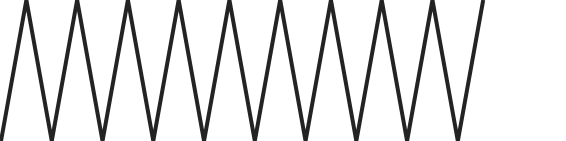

In [9]:
d = document(200,50,'mm')
page = d.addpage()
lineTex = shape().stroke(rgba(0, 0, 0, 220)).width(4)
myZig = makeZigZag(180,50,20)
zigShape = lineTex.polyline(myZig.translate(0,0))
page.place(zigShape)
show(page)


In [10]:
#makes a zigzag with a randomly selected height for each line
#receives a list of numbers for options

def makeZigZag2(length, height, options, segs):
    segWidth = length/segs
    pts = []
    for i in range(segs):
        x = segWidth*i
        if i%2 == 0:
            y = choice(height)
            pts.append([x,y])
        else:
            pts.append([x,height])
    return Polyline(pts)

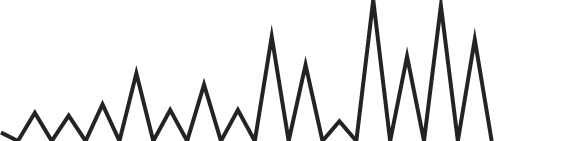

In [11]:
d = document(200,50,'mm')
page = d.addpage()
lineTex = shape().stroke(rgba(0, 0, 0, 220)).width(4)
myZig = makeZigZag2(180,50,[10,20,40],30)
zigShape = lineTex.polyline(myZig.translate(0,0))
page.place(zigShape)
show(page)


In [12]:
#makes a zigzag that accepts probabilities for line heights
#receives a list of ints for options and a list of floats for probs

def makeZigZag3(length, height, options, probs, segs):
    segWidth = length/segs
    pts = []
    for i in range(segs):
        x = segWidth*i
        if i%2 == 0:
            y = choice(options, p = probs)
            pts.append([x,y])
        else:
            pts.append([x,height])
    return Polyline(pts)

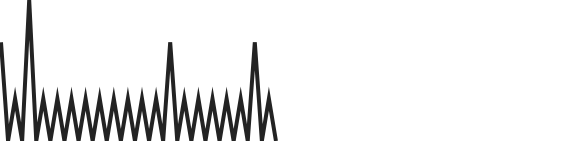

In [13]:
#segment heights in DT sig (20 total): 15 low, 2 med, 3 tall
d = document(200,50,'mm')
page = d.addpage()
lineTex = shape().stroke(rgba(0, 0, 0, 220)).width(4)
myZig = makeZigZag3(100,50,[35,15,0],[15/20, 3/20, 2/20], 40)
zigShape = lineTex.polyline(myZig.translate(0,0))
page.place(zigShape)
show(page)


In [14]:
#zigzag3 but more stylized

def makeZigZag4(length, height, options, probs, segs):
    segWidth = length/segs
    pts = []
    for i in range(segs):
        x = segWidth*i
        if i%2 == 0:
            pts.append([x,height])
        else:
            yVal = choice(options, p = probs)
            y = uniform(yVal-3, yVal+3)
            pts.append([x,y])

            
    return Polyline(pts)

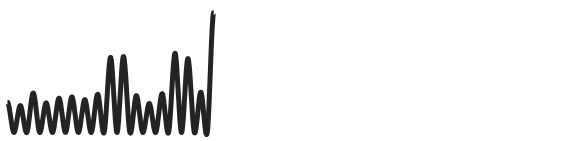

In [15]:
d = document(200,50,'mm')
page = d.addpage()
lineTex = shape().stroke(rgba(0, 0, 0, 220)).width(5).join('round')
myZig = makeZigZag4(80,50,[38,22,10],[15/20, 3/20, 2/20], 35)
zigShape = lineTex.path(myZig.smooth_path().translate(0,-3))
page.place(zigShape)
show(page)


In [16]:
#zigzag4 but italicized

def makeZigZag5(length, height, options, probs, segs):
    segWidth = length/segs
    pts = []
    for i in range(segs):
        x = segWidth*i
        if i%2 == 0:
            yVal = choice(options, p = probs)
            y = uniform(yVal-3, yVal+3)
            pts.append([x,y])
        else:
            pts.append([x-3,height])
    return Polyline(pts)

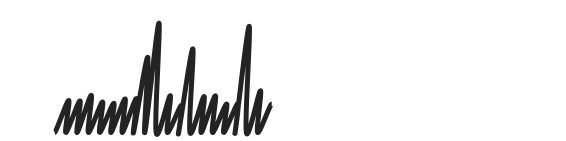

In [17]:
d = document(200,50,'mm')
page = d.addpage()
lineTex = shape().stroke(rgba(0, 0, 0, 220)).width(5).join('round')
myZig = makeZigZag5(80,50,[38,23,13],[15/20, 3/20, 2/20], 40)
zigShape = lineTex.path(myZig.smooth_path().translate(20,-3))
page.place(zigShape)
show(page)


In [18]:
#Official DJT signature generator:

#first letters are always tall and greater variation of tall letters


def makeDJTSig(length, height, options, probs, segs):
    segWidth = length/segs
    pts = []
    for i in range(segs): # lines for i<2 aren't shown
        x = segWidth*i
        if i%2 == 0: #line going up
            if i==2: 
                yVal = options[2] #first stroke is always tall
            else: 
                yVal = choice(options, p = probs)
            if yVal == options[2]: #if letter is tall:
                x2 = uniform(x-segWidth, x+segWidth)
                y2 = uniform(height*.3,height*.8)
                pts.append([x2,y2])
            y = uniform(yVal-3, yVal+3)
            pts.append([x,y])
            
        else: #line going down
            if yVal == options[2] & i<49: #if letter is tall, adds a subsegment
                x2 = uniform(x-segWidth*2, x+segWidth*2)
                y = uniform(height*.3,height*.8)
                x = uniform(x2-segWidth, x2+segWidth)
                pts.append([x,y])
                pts.append([x2,height])
            else:
                pts.append([x-3,height])
    return Polyline(pts)

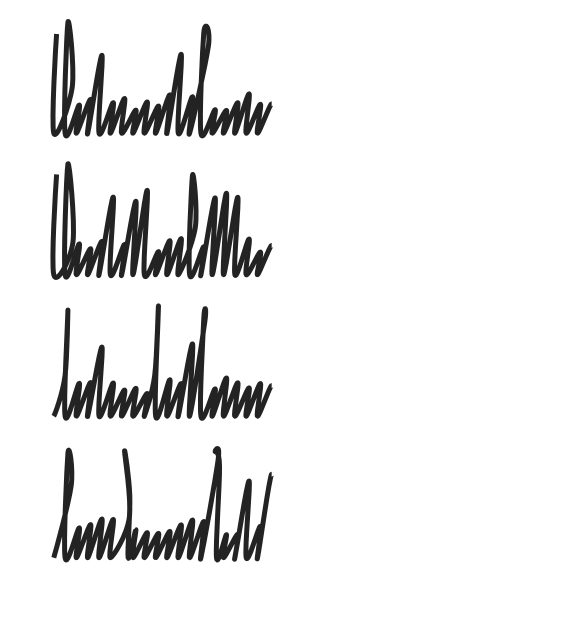

In [31]:
d = document(200,220,'mm')
page = d.addpage()
lineTex = shape().stroke(rgba(0, 0, 0, 220)).width(5).join('round')
for s in range(4):
    myZig = makeDJTSig(80,50,[39,23,13],[15/20, 2/20, 3/20], 40)
    zigShape = lineTex.path(myZig.smooth_path().translate(20,50*s-3))
    page.place(zigShape)
show(page)


DJT's official presidential signature:
![DJTSig](DJTSig_official.jpeg)

And one particularly successful recreation:
![DJTSig New](DJTSig_close.jpeg)

In [25]:
#exaggerates some key elements of DJT's signature 

#increase attOffset to exaggerate features (or set to 0 for no exaggeration)

def extraSig(length, height, options, probs, segs, attOffset):
    segWidth = length/segs
    pts = []
    for i in range(segs): # lines for i<2 aren't shown
        x = segWidth*i
        if i%2 == 0: #line going up
            if i==2: 
                yVal = options[2] #first stroke is always tall
            else: 
                yVal = choice(options, p = probs)
            if yVal == options[2]: #if letter is tall:
                x2 = uniform(x-segWidth, x+segWidth)
                y2 = uniform(height*.3,height*.8)
                
                x2 = uniform(x2+attOffset, x2-attOffset)
                y2 = uniform(y2+attOffset, y2-attOffset)
                pts.append([x2,y2])
            y = uniform(yVal-3, yVal+3)
            
            y = uniform(y+attOffset, y-attOffset)
            x = uniform(x+attOffset, x-attOffset)
            pts.append([x,y])
            
        else: #line going down
            if yVal == options[2] & i<49: #if letter is tall, adds a subsegment
                x2 = uniform(x-segWidth*2, x+segWidth*2)
                y = uniform(height*.3,height*.8)
                x = uniform(x2-segWidth, x2+segWidth)
                
                y = uniform(y+attOffset, y-attOffset)
                x = uniform(x+attOffset, x-attOffset)

                pts.append([x,y])
                
                x2 = uniform(x2+attOffset, x2-attOffset)
                
                pts.append([x2,uniform(height+attOffset, height-attOffset)])
            else:
                pts.append([x-4,uniform(height+attOffset, height-attOffset)])
    return Polyline(pts)

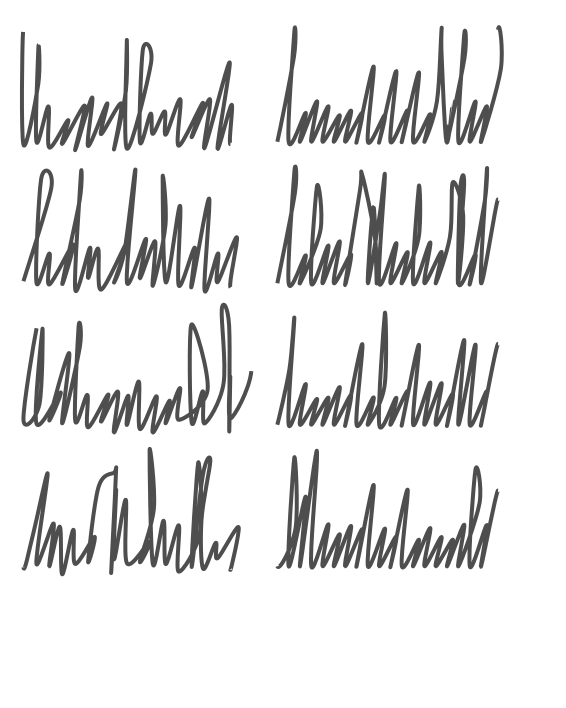

In [35]:
# increase attOffset to exaggerate features (or set to 0 for original)
# shows exaggerated on the left, original on the right


attOffset = 3


d = document(200,250,'mm')
page = d.addpage()
lineTex = shape().stroke(rgba(50, 50, 50, 220)).width(4).join('round')
for s in range(4):  
    shape2 = extraSig(80,50,[38,23,13],[15/20, 2/20, 3/20], 40, 0)
    
    shape1 = extraSig(80,50,[38,23,13],[15/20, 2/20, 3/20], 35, attOffset)
    
    sig1 = lineTex.path(shape1.smooth_path().translate(10,50*s))
    sig2 = lineTex.path(shape2.smooth_path().translate(100,50*s))
    page.place(sig1)
    page.place(sig2)
    
show(page)


DJT's signature over time':
![DJTSig Old](DJTSig_chronology.jpeg)